In [125]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf




In [187]:
#transforming all the data
train=pd.read_csv("mnist_train.csv")
test=pd.read_csv("mnist_test.csv")
train=np.array(train)
test=np.array(test)
m,n=train.shape
m1,n1=test.shape
test=test[1000:m].T
Y_test = test[0]
X_test = test[1:n]
X_test = X_test / 255.

data_train = train[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [189]:
#confirming the correct shapes
print(Y_train.shape)
print(X_train.shape)
print(Y_test.shape)
print(X_test.shape)
print(Y_test)

(59000,)
(784, 59000)
(9000,)
(784, 9000)
[9 0 2 ... 4 5 6]


In [190]:
#all functions for gradient decentu
#creates random note vales
def init_params():
  W1=np.random.rand(10,784)- 0.5
  b1=np.random.rand(10,1)-0.5
  W2=np.random.rand(10, 10) - .5
  b2= np.random.rand(10,1) - .5
  return W1,b1,W2,b2
# activation function
def ReLu(Z):
  return np.maximum(0, Z)
def softmax(Z):
  A = np.exp(Z)/ sum(np.exp(Z))
  return A
# calculates the values to the next successive node
def forward_prop(W1,b1,W2,b2,X):
  Z1=W1.dot(X)+b1
  A1=ReLu(Z1)
  Z2=W2.dot(A1)+b2
  A2= softmax(Z2)
  return Z1,A1,Z2,A2
def one_hot(Y):
  one_hot_Y = np.zeros((Y.size, Y.max() + 1))
  one_hot_Y[np.arange(Y.size), Y] = 1
  one_hot_Y = one_hot_Y.T
  return one_hot_Y
#derivative of the relu
def deriv_ReLU(Z):
  return Z > 0
# back prop goes back throught the neural network adjusting the values after
# incorrect predicitons to bring it closer to the correct predictison
def back_prop(Z1, A1, Z2, A2, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dw2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dw1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1)
    return dw1, db1, dw2, db2

def update_params(W1,b1,W2,b2,dw1,db1,dw2,db2,alpha):
  W1=W1-alpha*dw1
  b1=b1-alpha*db1
  W2=W2-alpha*dw2
  b2=b2-alpha*db2
  return W1,b1,W2,b2

In [191]:
def get_accuracy(predictions, Y):
  print(predictions, Y)
  return np.sum(predictions == Y) / Y.size
def get_predictions(A2):
  return np.argmax(A2, 0)
# applied the functions to the np arrays
def gradient_descent(X,Y,alpha,iterations):
  W1,b1,W2,b2=init_params()
  for i in range(iterations):
    Z1,A1,Z2,A2=forward_prop(W1,b1,W2,b2,X)
    dw1,db1,dw2,db2=back_prop(Z1,A1,Z2,A2,W2,X,Y)
    W1,b1,W2,b2=update_params(W1,b1,W2,b2,dw1,db1,dw2,db2,alpha)
    if i % 10 == 0:
      print("Iteration: ", i)
      print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
  return W1,b1,W2,b2

In [192]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)


Iteration:  0
[6 5 7 ... 6 6 6] [0 7 1 ... 5 6 8]
Accuracy:  0.11415254237288136
Iteration:  10
[6 5 7 ... 6 6 6] [0 7 1 ... 5 6 8]
Accuracy:  0.21027118644067797
Iteration:  20
[6 7 4 ... 6 6 6] [0 7 1 ... 5 6 8]
Accuracy:  0.27576271186440676
Iteration:  30
[6 7 4 ... 6 6 6] [0 7 1 ... 5 6 8]
Accuracy:  0.31845762711864406
Iteration:  40
[6 7 1 ... 6 6 6] [0 7 1 ... 5 6 8]
Accuracy:  0.3515593220338983
Iteration:  50
[6 7 1 ... 6 6 6] [0 7 1 ... 5 6 8]
Accuracy:  0.39205084745762714
Iteration:  60
[6 7 1 ... 6 6 8] [0 7 1 ... 5 6 8]
Accuracy:  0.45089830508474577
Iteration:  70
[6 7 1 ... 6 6 8] [0 7 1 ... 5 6 8]
Accuracy:  0.5085593220338983
Iteration:  80
[6 7 1 ... 4 6 8] [0 7 1 ... 5 6 8]
Accuracy:  0.553864406779661
Iteration:  90
[6 7 1 ... 4 6 8] [0 7 1 ... 5 6 8]
Accuracy:  0.5941016949152542
Iteration:  100
[6 7 1 ... 4 6 8] [0 7 1 ... 5 6 8]
Accuracy:  0.6260338983050847
Iteration:  110
[6 7 1 ... 4 6 8] [0 7 1 ... 5 6 8]
Accuracy:  0.6525762711864407
Iteration:  120
[6 7 1

In [193]:
def make_predictions(X, W1, b1, W2, b2):
  _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
  predictions = get_predictions(A2)
  return predictions
def test_prediction(index, W1, b1, W2, b2):
  current_image = X_train[:, index, None]
  prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
  label = Y_train[index]
  print("Prediction: ", prediction)
  print("Label: ", label)
  current_image = current_image.reshape((28, 28)) * 255
  plt.gray()
  plt.imshow(current_image, interpolation='nearest')
  plt.show()

In [194]:
test_predict= make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(test_predict, Y_test)

[7 0 2 ... 4 5 6] [9 0 2 ... 4 5 6]


0.857

Prediction:  [7]
Label:  7


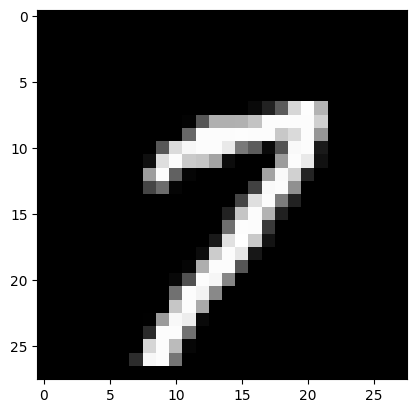

In [195]:
test_prediction(525, W1, b1, W2, b2)